In [48]:
import PIL
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import os

import cv2

In [12]:
test_img_path = './demo.jpg'

In [13]:
img = Image.open(test_img_path)

In [46]:
img.size

(4032, 3024)

In [45]:
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


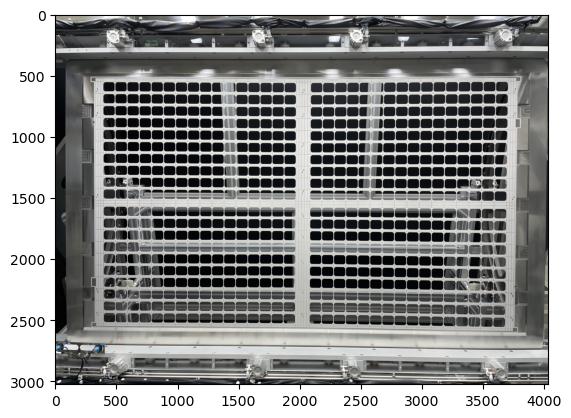

In [17]:
plt.imshow(img)

In [18]:
img.size

(4032, 3024)

In [21]:
def segmentation(img , col, row):
    '''
    Input
        img : source image
        col & row for segmentation (ex. 6x4 => 24 cuts)
    
    Output
        None
    '''
    w, h = img.size
    
    s_w = w/col
    s_h = h/row
    
    for n in range(1, (col*row)+1):
        x1 = ((n-1)%col) * s_w
        y1 = ((n-1)/col) * s_h
        x2 = x1 + s_w
        y2 = y1 + s_h
        
        filename = str(n) + '.jpg'
        
        new_img = img.crop((x1,y1,x2,y2))
        new_img.save(filename)


In [22]:
segmentation(img, 6, 4)

In [26]:
filelist = os.listdir('.')

In [41]:
for f in filelist:
    if not f.split('.')[0].isdigit():
        filelist.remove(f)

filelist.sort(key=len)

In [44]:
out = []
for i in range(4):
    line = []
    for j in range(6):
        line.append()
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [49]:
# opencv version
img = cv2.imread('./demo.jpg')

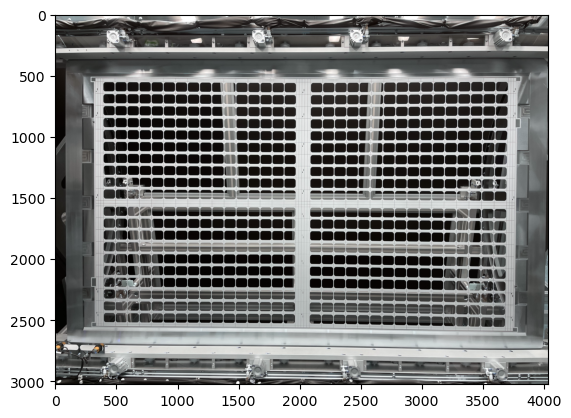

In [51]:
plt.imshow(img)

In [54]:
img.shape

(3024, 4032, 3)

In [69]:
def cropping_img(img_path, col, row):
    
    dest_dir = os.path.join('./', f"{col}_{row}_{col*row}cuts")
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    
    img = cv2.imread(img_path)
    h, w, _ = img.shape
    
    s_w = int(w/col)
    s_h = int(h/row)
    print(f"crop image size = {s_w}x{s_h}")

    for n in range(1, (col*row)+1):
        x1 = int(((n-1)%col) * s_w)
        y1 = int(((n-1)//col) * s_h)
        x2 = x1 + s_w
        y2 = y1 + s_h
        print(f"{n} roi : ({x1}, {y1}), ({x2}, {y2})")
        
        roi = img[y1:y2, x1:x2]
        cv2.imwrite(os.path.join(dest_dir, f"{n}_cv.jpg"), roi)

    

In [72]:
cropping_img("./demo.jpg", 3, 2)

crop image size = 1344x1512
1 roi : (0, 0), (1344, 1512)
2 roi : (1344, 0), (2688, 1512)
3 roi : (2688, 0), (4032, 1512)
4 roi : (0, 1512), (1344, 3024)
5 roi : (1344, 1512), (2688, 3024)
6 roi : (2688, 1512), (4032, 3024)
